In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
x_data = [4.0391, 1.3197, 9.5613, 0.5978, 3.5316, 0.1540, 1.6899, 7.3172, 4.5092, 2.9632]
y_data = [11.4215, 10.0112, 30.2991, 1.0625, 13.1776, -3.1976, 6.7367, 23.8550, 14.8951, 11.6137]

In [4]:
print(x_data,y_data)

[4.0391, 1.3197, 9.5613, 0.5978, 3.5316, 0.154, 1.6899, 7.3172, 4.5092, 2.9632] [11.4215, 10.0112, 30.2991, 1.0625, 13.1776, -3.1976, 6.7367, 23.855, 14.8951, 11.6137]


In [5]:
W = tf.Variable(tf.random_uniform([1],-5.0,5.0))
b = tf.Variable(tf.random_uniform([1],-5.0,5.0))

In [6]:
print(W)

Tensor("Variable/read:0", shape=(1,), dtype=float32)


In [7]:
print(b)

Tensor("Variable_1/read:0", shape=(1,), dtype=float32)


In [8]:
#공간 생성 float32크기의 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [9]:
hypothesis = W*X + b

In [10]:
print(hypothesis)

Tensor("add:0", dtype=float32)


In [11]:
#reduce_mean tensorflow에서 평균 값을 구하는 Method
cost = tf.reduce_mean(tf.square(hypothesis-Y))

In [12]:
a = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

In [13]:
init = tf.global_variables_initializer()

In [14]:
session = tf.Session()
session.run(init)

In [15]:
for step in range(2000):
    session.run(train, feed_dict = {X:x_data,Y:y_data})
    #20번 수행 할때마다 프린트 
    #feed_dict를 통해 지정하는 특정값을 파라미터로 전달가능.
    if step % 20 == 0:
        print(step, session.run(cost, feed_dict = {X:x_data,Y:y_data}),session.run(W),session.run(b))

0 13.0493 [ 3.49138618] [-3.02443099]
20 9.49612 [ 3.71955037] [-2.4598012]
40 8.51029 [ 3.64300418] [-2.02199316]
60 7.78144 [ 3.57718229] [-1.64554656]
80 7.24257 [ 3.52058578] [-1.32186031]
100 6.84416 [ 3.47192144] [-1.04353976]
120 6.54961 [ 3.43007731] [-0.80422664]
140 6.33183 [ 3.39409804] [-0.598454]
160 6.17082 [ 3.36316133] [-0.42152125]
180 6.05178 [ 3.33656025] [-0.26938605]
200 5.96377 [ 3.31368756] [-0.13857329]
220 5.8987 [ 3.29402089] [-0.02609433]
240 5.85059 [ 3.2771101] [ 0.07062031]
260 5.81503 [ 3.26256943] [ 0.15378013]
280 5.78873 [ 3.250067] [ 0.22528483]
300 5.76929 [ 3.2393167] [ 0.28676787]
320 5.75491 [ 3.23007298] [ 0.33963379]
340 5.74428 [ 3.22212481] [ 0.38509056]
360 5.73643 [ 3.21529078] [ 0.42417622]
380 5.73062 [ 3.20941448] [ 0.45778394]
400 5.72632 [ 3.20436168] [ 0.48668152]
420 5.72315 [ 3.20001721] [ 0.51152885]
440 5.7208 [ 3.19628143] [ 0.53289384]
460 5.71907 [ 3.19306922] [ 0.55126441]
480 5.71778 [ 3.19030738] [ 0.56706029]
500 5.71683 [ 3

In [16]:
#x가 5일때의 y값을 구하는 과정 
#feed_dict를 사용하여 hypothesis에 자동으로 대입한 결과가 나오도록 했다. 
answer = session.run(hypothesis,feed_dict={X:5})
print(str(answer))

[ 16.53078461]


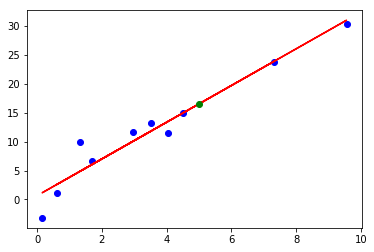

In [17]:
#그래프를 그리는 코드.
plt.figure(1)
plt.plot(x_data, y_data,'bo')
plt.plot(x_data,session.run(W)*x_data + session.run(b),'r')
plt.plot([5],answer,'go')
plt.show()